# Import libraries

In [1]:
import math
import numpy as np
import pandas as pd
import h5py
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
import scipy
from PIL import Image
import pandas as pd
import tensorflow as tf
from tensorflow.keras import Sequential 
from tensorflow.keras.metrics import Precision, Recall
import tensorflow.keras.layers as tfl
from tensorflow.python.framework import ops
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.models import load_model

# Load the dataset

In [2]:
all_merged = pd.read_csv('C:/Users/s3929438/all_features_desktop_100_final_latest.csv')

# Select a single user
## Create the training and testing sets for the user


In [3]:
user_train_set = all_merged[all_merged['User']==1].sample(frac=0.7, random_state=42)
sample_ids = user_train_set['sample']
user_test_set = all_merged[(all_merged['User']==1) & ~all_merged['sample'].isin (sample_ids)]

## Create the training and testing sets for all other users

In [4]:
all_train_set  = pd.DataFrame()
all_test_set = pd.DataFrame()
user_id = 1
for i in range (1,117):
    if i != user_id:
        train_set = all_merged[all_merged['User']==i].sample(frac=0.7, random_state=42)
        sample_ids = train_set['sample']
        test_set = all_merged[(all_merged['User']==i) & ~all_merged['sample'].isin (sample_ids) ]
    
        all_train_set = all_train_set.append(train_set,ignore_index=True)
        all_test_set = all_test_set.append(test_set, ignore_index=True)

# Add a new column by labelling the User data as 1 and all others data as 0

In [5]:
user_train_set['User_type']=1
all_train_set['User_type']=0
user_test_set['User_type']=1
all_test_set['User_type']=0

C:\Users\s3929438\AppData\Local\Temp/ipykernel_18812/4033866476.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_test_set['User_type']=1


# Combine all users and build the final datasets

In [6]:
final_train_set = user_train_set.append(all_train_set)
final_test_set = user_test_set.append(all_test_set)

# Define the x_train, x_test, y_train and y_test

In [7]:
X_train = pd.DataFrame(final_train_set.iloc[:,3:92])
y_train =final_train_set.iloc[:,92]
X_test = pd.DataFrame(final_test_set.iloc[:,3:92])
y_test = final_test_set.iloc[:,92]

In [8]:
feature_names = X_train.columns

# Oversample the training set

In [9]:
sm = SMOTE()
x_train_res, y_train_res = sm.fit_resample(X_train, y_train)

# Normalised x_train and x_test

In [10]:
scaled_data = MinMaxScaler()
scaled_train = pd.DataFrame(scaled_data.fit_transform(x_train_res), columns=feature_names)
scaled_test = pd.DataFrame(scaled_data.transform(X_test), columns=feature_names)

In [ ]:
# def KeystrokeModel():

#     model = tf.keras.Sequential([
           
#             tfl.ZeroPadding2D(padding=(0,0) , input_shape = (8850, 89,1), data_format="channels_last"),
#             tfl.Conv2D(32, (100,89), strides = (90,1)),
#             tfl.BatchNormalization(axis= 3),
#             tfl.ReLU(max_value=None, negative_slope=0.0, threshold=0.0),
# #             tfl.MaxPool2D(pool_size=(5, 89),strides=None,data_format=None),
# #             tfl.Conv2D(16, (5,5), strides = (4,4)),
# #             tfl.BatchNormalization(axis= 3),
# #             tfl.ReLU(max_value=None, negative_slope=0.0, threshold=0.0),
# #             tfl.MaxPool2D(pool_size=(2, 2),strides=None,data_format=None),
#             tfl.Flatten(),
#             tfl.Dense(3136,activation='relu'),
#             tfl.Dense(1,activation='sigmoid')
#         ])
    
#     return model

In [ ]:
# model = KeystrokeModel()
# model.compile(optimizer='adam',
#                    loss='binary_crossentropy',
#                    metrics=['accuracy'])

# Apply general deep learning model

### This model working fine. But the results we achived are very low. 

In [11]:
# Seperated the training set into training and validation set
x_train, x_val ,  y_train, y_val = train_test_split(scaled_train, y_train_res, test_size=0.3, random_state=42)

In [12]:
y_train.value_counts()

0    3103
1    3092
Name: User_type, dtype: int64

In [13]:
x_train

,Error_rate_%,Cpslck_usage,WPM,neg_UD_%,neg_UU_%,mean_hold_time,mean_F1_dis_0_LL,mean_F1_dis_0_RR,mean_F1_dis_1_LL,mean_F1_dis_1_RR,...,mean_F1_co,mean_F2_co,mean_F3_co,mean_F4_co,mean_F1_le,mean_F2_le,mean_F3_le,mean_F4_le,RSA_ratio,LSA_ratio
3207,0.209302,0.0,0.288801,0.029412,0.000000,0.000000,0.015665,0.019643,0.218896,0.144789,...,0.319134,0.112932,0.065482,0.085268,0.257143,0.126855,0.075256,0.090120,0.804545,0.804545
3001,0.139535,0.0,0.056833,0.193127,0.126276,0.098585,0.000000,0.000000,0.182682,0.151010,...,0.291445,0.050930,0.000000,0.000000,0.232275,0.074677,0.000000,0.000000,0.187500,0.812500
2118,0.255814,0.0,0.204393,0.029412,0.000000,0.027432,0.000000,0.000000,0.134663,0.134543,...,0.291445,0.050930,0.000000,0.000000,0.232275,0.074677,0.000000,0.000000,1.000000,1.000000
6165,0.104420,0.0,0.054450,0.118657,0.075572,0.106447,0.000000,0.046530,0.230293,0.166939,...,0.343385,0.151949,0.126985,0.149127,0.339725,0.219908,0.179903,0.192350,0.813740,0.000000
6871,0.000000,0.0,0.302155,0.129264,0.036964,0.059344,0.023797,0.035305,0.182265,0.184514,...,0.291445,0.050930,0.000000,0.000000,0.232275,0.074677,0.000000,0.000000,0.887147,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,0.104596,0.0,0.335049,0.095600,0.010433,0.044844,0.018057,0.034059,0.188056,0.218914,...,0.291445,0.050930,0.000000,0.000000,0.232275,0.074677,0.000000,0.000000,0.250395,0.000000
5191,0.025176,0.0,0.413989,0.212628,0.000000,0.063173,0.000000,0.000000,0.185196,0.150440,...,0.291445,0.050930,0.000000,0.000000,0.232275,0.074677,0.000000,0.000000,0.180430,0.000000
5390,0.139535,0.0,0.309888,0.016948,0.000000,0.040007,0.019296,0.040379,0.194201,0.159072,...,0.261467,0.109803,0.063247,0.148841,0.265160,0.135682,0.100196,0.111669,0.000000,0.000000
860,0.046512,0.0,0.212778,0.000000,0.000000,0.023048,0.000000,0.000000,0.217279,0.153490,...,0.346823,0.140390,0.102432,0.111862,0.265079,0.126855,0.093919,0.097831,1.000000,1.000000


In [14]:
X = x_train.values
Y = y_train.values
val_x = x_val.values
val_y = y_val.values

In [15]:
model = Sequential()
model.add(tfl.Dense(264, input_dim=89, activation='relu')) 
# model.add(tfl.Dense(128, activation='relu'))
model.add(tfl.Dense(1, activation='sigmoid'))
model.summary() 
model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy', Precision() ,Recall()])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 264)               23760     
                                                                 
 dense_1 (Dense)             (None, 1)                 265       
                                                                 
Total params: 24,025
Trainable params: 24,025
Non-trainable params: 0
_________________________________________________________________


In [16]:
# Early stopping 
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

In [17]:
history = model.fit(X, Y, validation_data=(val_x, val_y), epochs=100, verbose=1, callbacks=[es, mc] )

Epoch 1/100
165/194 [========================>.....] - ETA: 0s - loss: 0.3544 - accuracy: 0.9072 - precision: 0.8594 - recall: 0.9739      
Epoch 1: val_accuracy improved from -inf to 0.95028, saving model to best_model.h5
194/194 [==============================] - 1s 4ms/step - loss: 0.3302 - accuracy: 0.9127 - precision: 0.8649 - recall: 0.9777 - val_loss: 0.1985 - val_accuracy: 0.9503 - val_precision: 0.9116 - val_recall: 0.9977
Epoch 2/100
174/194 [=========================>....] - ETA: 0s - loss: 0.1581 - accuracy: 0.9499 - precision: 0.9093 - recall: 0.9993
Epoch 2: val_accuracy improved from 0.95028 to 0.95480, saving model to best_model.h5
194/194 [==============================] - 0s 2ms/step - loss: 0.1556 - accuracy: 0.9504 - precision: 0.9102 - recall: 0.9994 - val_loss: 0.1462 - val_accuracy: 0.9548 - val_precision: 0.9174 - val_recall: 1.0000
Epoch 3/100
161/194 [=======================>......] - ETA: 0s - loss: 0.1295 - accuracy: 0.9596 - precision: 0.9253 - recall: 1.00

194/194 [==============================] - 0s 2ms/step - loss: 0.0208 - accuracy: 0.9944 - precision: 0.9888 - recall: 1.0000 - val_loss: 0.0374 - val_accuracy: 0.9913 - val_precision: 0.9830 - val_recall: 1.0000
Epoch 21/100
168/194 [========================>.....] - ETA: 0s - loss: 0.0185 - accuracy: 0.9952 - precision: 0.9903 - recall: 1.0000
Epoch 21: val_accuracy did not improve from 0.99247
194/194 [==============================] - 0s 2ms/step - loss: 0.0187 - accuracy: 0.9948 - precision: 0.9898 - recall: 1.0000 - val_loss: 0.0364 - val_accuracy: 0.9887 - val_precision: 0.9780 - val_recall: 1.0000
Epoch 22/100
185/194 [===========================>..] - ETA: 0s - loss: 0.0157 - accuracy: 0.9961 - precision: 0.9923 - recall: 1.0000
Epoch 22: val_accuracy did not improve from 0.99247
194/194 [==============================] - 0s 2ms/step - loss: 0.0155 - accuracy: 0.9963 - precision: 0.9926 - recall: 1.0000 - val_loss: 0.0403 - val_accuracy: 0.9853 - val_precision: 0.9716 - val_re

Epoch 41/100
175/194 [==========================>...] - ETA: 0s - loss: 0.0039 - accuracy: 0.9993 - precision: 0.9986 - recall: 1.0000
Epoch 41: val_accuracy did not improve from 0.99473
194/194 [==============================] - 0s 2ms/step - loss: 0.0037 - accuracy: 0.9994 - precision: 0.9987 - recall: 1.0000 - val_loss: 0.0276 - val_accuracy: 0.9917 - val_precision: 0.9838 - val_recall: 1.0000
Epoch 42/100
176/194 [==========================>...] - ETA: 0s - loss: 0.0029 - accuracy: 0.9995 - precision: 0.9989 - recall: 1.0000
Epoch 42: val_accuracy did not improve from 0.99473
194/194 [==============================] - 0s 2ms/step - loss: 0.0029 - accuracy: 0.9995 - precision: 0.9990 - recall: 1.0000 - val_loss: 0.0288 - val_accuracy: 0.9921 - val_precision: 0.9845 - val_recall: 1.0000
Epoch 43/100
163/194 [========================>.....] - ETA: 0s - loss: 0.0026 - accuracy: 0.9998 - precision: 0.9996 - recall: 1.0000 
Epoch 43: val_accuracy did not improve from 0.99473
194/194 [===

161/194 [=======================>......] - ETA: 0s - loss: 6.9082e-04 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000
Epoch 61: val_accuracy did not improve from 0.99548
194/194 [==============================] - 0s 2ms/step - loss: 6.6992e-04 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 0.0297 - val_accuracy: 0.9925 - val_precision: 0.9852 - val_recall: 1.0000
Epoch 62/100
189/194 [============================>.] - ETA: 0s - loss: 9.6443e-04 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000
Epoch 62: val_accuracy did not improve from 0.99548
194/194 [==============================] - 0s 2ms/step - loss: 9.5516e-04 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 0.0259 - val_accuracy: 0.9928 - val_precision: 0.9859 - val_recall: 1.0000
Epoch 63/100
153/194 [======================>.......] - ETA: 0s - loss: 6.2521e-04 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000
Epoch 63: val_accuracy did not improve from 0.99548
194/19

In [18]:
saved_model = load_model('best_model.h5')

In [19]:
train_loss , train_acc, train_prec, train_recall = saved_model.evaluate(X, Y, verbose=0)
test_loss , test_acc, test_prec, test_recall = saved_model.evaluate(scaled_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
print('Train: %.3f, Test: %.3f' % (train_prec, test_prec))
print('Train: %.3f, Test: %.3f' % (train_recall, test_recall))

Train: 1.000, Test: 0.987
Train: 1.000, Test: 0.308
Train: 1.000, Test: 0.533


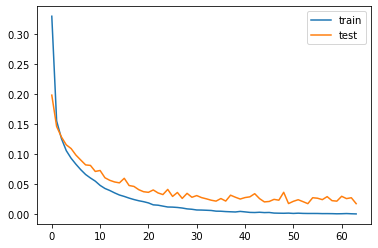

In [20]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

# Applying CNN model 

In [ ]:
# The x_train and y_train are reshape to input to the CNN model

X_tr = (scaled_train.values).reshape(8850,89,1,-1)
Y_tr = (pd.DataFrame(y_train_res).values).reshape(8850,1,-1)

In [ ]:
model = Sequential()
model.add(tfl.Conv2D(32, input_shape = (8850, 89,1), kernel_size=(50,89)))
# model.add(tfl.Conv2D(64, kernel_size=(5,5), activation='relu'))
model.add(tfl.Flatten())
model.add((tfl.Dense(64, activation='relu')))
model.add(tfl.Dense(1, activation='sigmoid'))
model.summary()
model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(X_tr,Y_tr,epochs=80)

# Applying LSTM model

In [ ]:
model = Sequential()
model.add(LSTM(64, input_shape=(8850,89), activation='relu'))
model.add(Dropout(0.5))
# model.add(LSTM(128))
# model.add(Dropout(0.5))
# model.add(LSTM(256))
# model.add(Dropout(0.5))
# model.add(LSTM(64))
# model.add(Dropout(0.5))
model.add(Dense(8850, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', keras.metrics.Precision(),
                                                                     keras.metrics.Recall()])

In [ ]:
X = np.array(scaled_train).reshape((-1,8850,89))
Y = np.array(y_train_res).reshape((-1,8850))

In [ ]:
X_tst = np.array(scaled_test).reshape((-1,1919,89))
Y_tst = np.array(y_test).reshape((-1,1919))

In [ ]:
scaled_test.shape

In [ ]:
X

In [ ]:
model.fit(X,Y, epochs=50, shuffle=True, verbose=2)

In [ ]:
Performance = model.evaluate(X_tst, Y_tst, verbose=0)

In [ ]:
Performance